In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#Importing essential libraries
%tensorflow_version 1.x
import tensorflow as tf
import random
import numpy as np
from google.colab import files
import pandas as pd
from tqdm import tqdm
import os
import math
import shutil
import pathlib
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image



import sklearn.model_selection
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!pip install 'h5py==2.10.0'
import cv2

TensorFlow 1.x selected.


In [ ]:
#Checking for gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.2


In [ ]:
#Fixing python random seed
random.seed(42)
#fixing numpy random seed
np.random.seed(21)
#fixing tensorflow random seed
tf.compat.v1.random.set_random_seed(42)

In [ ]:
image_data = np.load('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/data_cropped.npy')
image_labels = np.load('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/labels_cropped.npy')



In [ ]:
print(image_data.shape,image_labels.shape)

(39251, 64, 64, 3) (39251,)


In [ ]:
# shuffling the image data
np.random.seed(21)
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]



In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split


X_train,X_val,y_train,y_val = train_test_split(image_data,image_labels,test_size = 0.3, random_state = 42,shuffle = True)

# X_train = X_train/255
# X_val = X_val/255


In [ ]:
print(X_train.shape,y_train.shape,X_val.shape, y_val.shape)

(27475, 64, 64, 3) (27475,) (11776, 64, 64, 3) (11776,)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

In [ ]:
IMG_HEIGHT,IMG_WIDTH = 64,64
channels = 3

model_cropped = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model_cropped.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)      

In [ ]:
print(y_train.shape)
print(y_val.shape)

(27475, 43)
(11776, 43)


In [ ]:
from tensorflow.keras.optimizers import Adam
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model_cropped.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history_cropped = model_cropped.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))
hist_df = pd.DataFrame(history.history) 
history_cropped.save("/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/history_cropped.npy",hist_df)
model_cropped.save("/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/model_cropped.h5")

Epoch 1/30
859/859 [==============================] - 60s 70ms/step - loss: 2.0331 - acc: 0.4578 - val_loss: 0.8822 - val_acc: 0.7165
Epoch 2/30
859/859 [==============================] - 57s 67ms/step - loss: 0.7330 - acc: 0.7692 - val_loss: 0.4343 - val_acc: 0.8634
Epoch 3/30
859/859 [==============================] - 57s 66ms/step - loss: 0.3922 - acc: 0.8778 - val_loss: 0.2083 - val_acc: 0.9333
Epoch 4/30
859/859 [==============================] - 56s 65ms/step - loss: 0.2667 - acc: 0.9173 - val_loss: 0.2201 - val_acc: 0.9307
Epoch 5/30
859/859 [==============================] - 56s 65ms/step - loss: 0.1997 - acc: 0.9383 - val_loss: 0.1713 - val_acc: 0.9458
Epoch 6/30
859/859 [==============================] - 56s 65ms/step - loss: 0.1642 - acc: 0.9491 - val_loss: 0.1658 - val_acc: 0.9485
Epoch 7/30
859/859 [==============================] - 56s 65ms/step - loss: 0.1498 - acc: 0.9527 - val_loss: 0.1087 - val_acc: 0.9676
Epoch 8/30
859/859 [==============================] - 58s 68ms

In [ ]:
## model.save("/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/model.h5")

In [ ]:
#model_cropped.save_weights("/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/output_cropped")

In [ ]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'principal_components',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standa

In [ ]:
history = np.load('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/history_cropped.npy')

FileNotFoundError: ignored

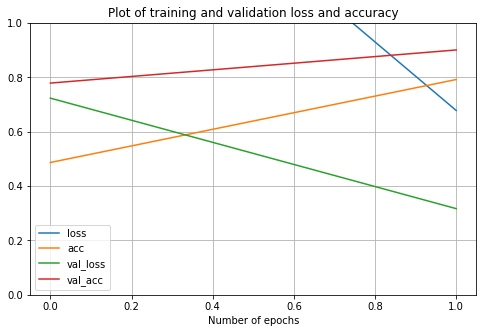

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Number of epochs")
plt.title("Plot of training and validation loss and accuracy")
plt.show()

In [ ]:
!pip install 'h5py==2.10.0'

In [ ]:
from sklearn.metrics import accuracy_score
model_cropped = tf.keras.models.load_model('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/model_cropped.h5')
X_test = np.load('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/test_data_cropped.npy')
labels = np.load('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/test_labels_cropped.npy')
pred = model_cropped.predict_classes(X_test)

# Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)


Test Data accuracy:  95.49485352335708


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)


In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

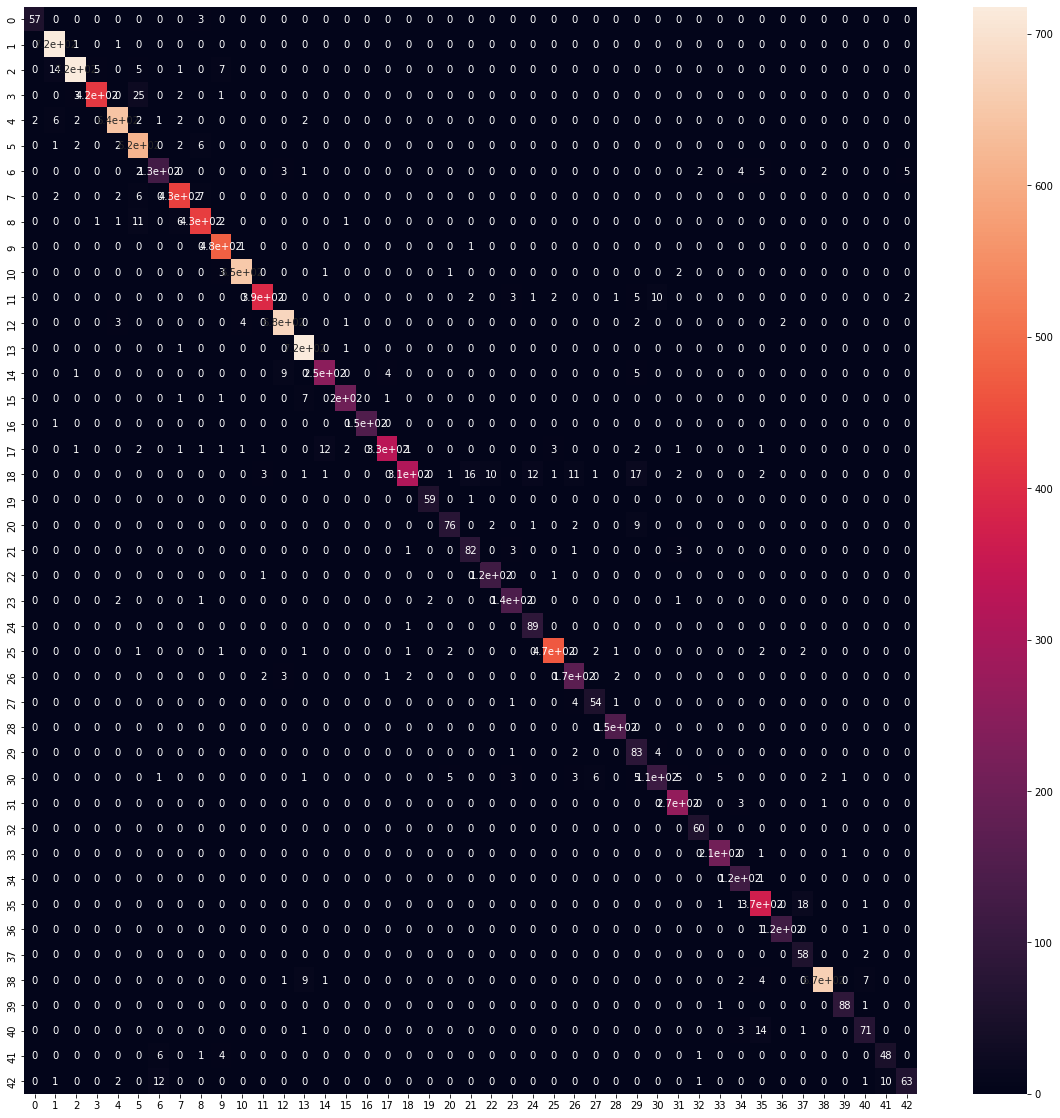

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [ ]:
 from sklearn.metrics import classification_report

print(classification_report(labels, pred))
cr = pd.DataFrame(classification_report(labels,pred, output_dict=True)).transpose()
np.save('/content/drive/MyDrive/Traffic_Sign_Recognition/data_traffic_sign/cr_cropped.npy',cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.97      1.00      0.98       720
           2       0.99      0.96      0.97       750
           3       0.99      0.93      0.96       450
           4       0.98      0.97      0.98       660
           5       0.92      0.98      0.95       630
           6       0.86      0.84      0.85       150
           7       0.96      0.96      0.96       450
           8       0.96      0.95      0.95       450
           9       0.96      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.98      0.94      0.96       420
          12       0.98      0.98      0.98       690
          13       0.97      1.00      0.98       720
          14       0.94      0.93      0.94       270
          15       0.98      0.95      0.96       210
          16       1.00      0.99      1.00       150
          17       0.98    

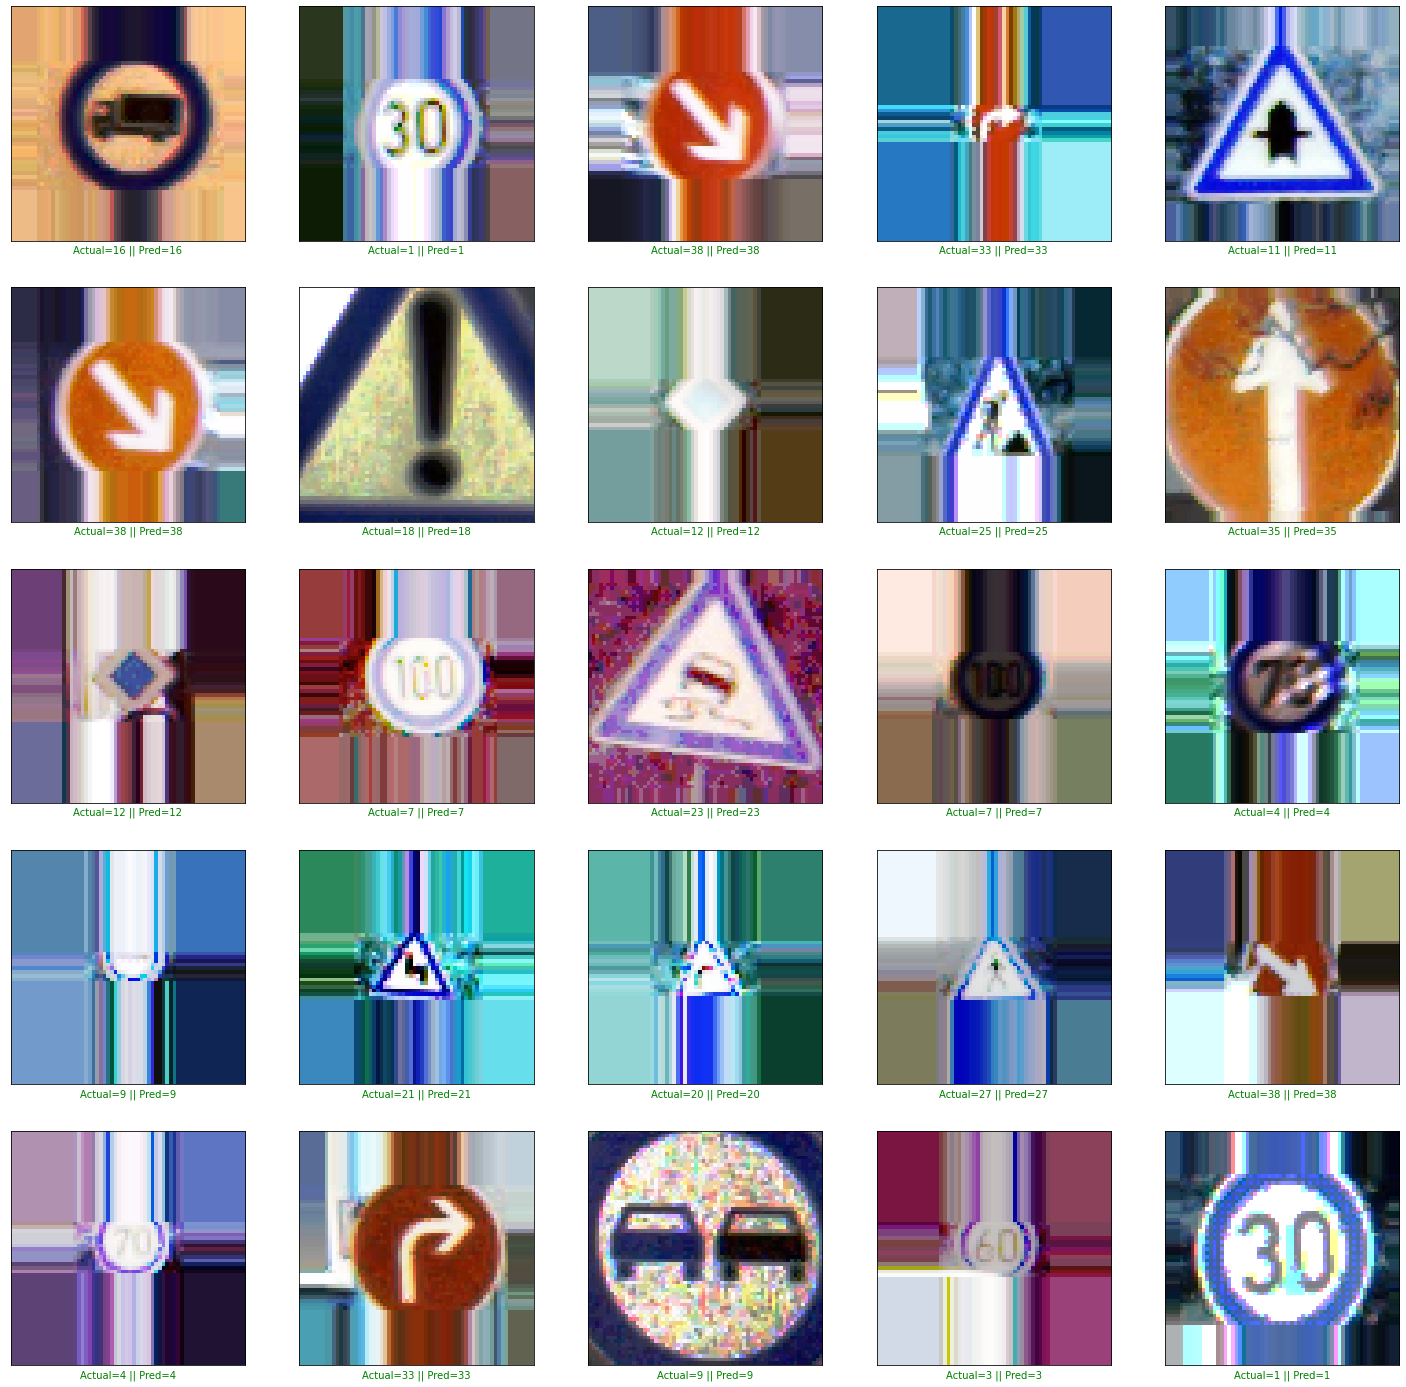

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.savefig('/content/drive/MyDrive/Traffic_Sign_Recognition/final_predictions')
plt.show()